## Playing with sampling and the Central Limit Theorem

Begin with imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's create a population that isn't normally distributed we will concatenate several normal distributions to do so:

In [3]:
d1 = np.random.normal(loc=-6.4, scale=1.2, size=40000)
d2 = np.random.normal(loc=4, scale=10, size=16000)
d3 = np.random.normal(loc=22, scale=8, size=72000)
population = np.concatenate([d1, d2, d3])
pop = pd.DataFrame(data=population, columns=['population'])
pop.head()

,population
0,-6.948055
1,-6.764784
2,-7.427682
3,-5.525466
4,-8.821243


## Make a histogram. Play around with bin size

Hint: there are multiple ways to do this. Try numpy.histogram or the pandas method hist.

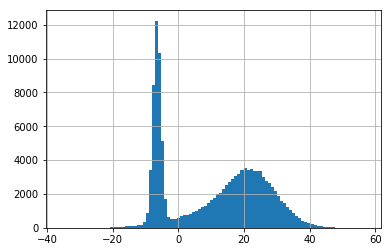

In [4]:
pop['population'].hist(bins=100)

Extra: Try displaying the data using an alternate visualization technique, a violin plot. Seaborn has a built-in method that is useful for this.

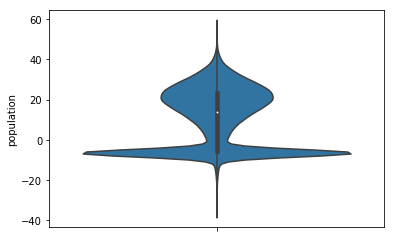

In [62]:
import seaborn as sns
ax = sns.violinplot(y='population', data=pop)

## Make a kernel density estimate of the population distribution

Hint: pandas.DataFrame.plot.kde

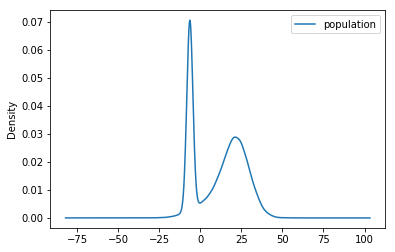

In [5]:
pop.plot.kde()

## Compute the mean of the population

In [6]:
pop['population'].mean()

10.867411157510224

## Computer the standard deviation of the population

In [7]:
pop['population'].std()

14.73669533894088

## We have described our population. Now let's draw a sample of size n and look at the distrubtion of our sample mean and s.d.

Write a function that samples the pop dataframe with an argument n that is the number of samples to take. Sample without replacement.

In [7]:
def draw_sample(pop, n):
    subset = np.random.choice(np.array(list(pop.index)), size=n, replace=False)
    sample = pd.DataFrame(data=pop['population'][subset].values, columns=['sample'])
    return sample

In [8]:
sample = draw_sample(pop, 20)

In [9]:
sample

,sample
0,23.707573
1,-5.837157
2,7.805854
3,-5.386720
4,34.429081
5,-4.426331
6,33.312902
7,9.530821
8,22.204563
9,-6.990884


## Now we want to draw repeated samples of size *n* from the population

Create another function that calls the first `samples` times. Have `samples` be an argument to the function along with n which is the argument to the first function. For each sample, append the mean and the standard deviation of the sample to two separate lists and return them.

Hint: use a loop with    range(samples) iterations. To create an empty list at the start of a function, try something like:

    def repeat_samples(samples, n):  
      means = []  
      sds = []  
      ...  
      return (means, sds)
    
then use the append method to append each mean and sd value to the end of each respective list.

In [8]:
def repeat_samples(pop, samples, n):
    means = []
    sds = []
    
    for i in range(samples):
        sample = draw_sample(pop, n)
        means.append(sample['sample'].mean())
        sds.append(sample['sample'].std())
    
    return (means, sds)

In [9]:
means, sds = repeat_samples(pop, 30, 30)

In [10]:
means

[12.337138585253005,
 13.219474253915134,
 9.527027914447178,
 19.050279034694658,
 7.865150520880872,
 11.935004507705093,
 20.605773275670337,
 12.396839435510028,
 11.558780868284549,
 13.438299856949197,
 13.267410884843104,
 9.393479688333402,
 8.498377198826564,
 13.948498382873169,
 9.341248172493113,
 12.599206201510519,
 11.669054968370022,
 8.666946438060702,
 12.227660195183175,
 12.32934864960399,
 10.950070161121943,
 19.130966253889326,
 10.247789769259985,
 11.68712241202699,
 12.92504627540123,
 10.324748172681241,
 14.73751162730912,
 10.137674363853193,
 11.135492409735667,
 8.327684234231002]

## Almost there!

Now make a function with two arguments `samples` and `n` that takes the return values from the last function and
* converts the lists to a single dataframe
* plots two histograms of the columns (mean, sd)
* prints out the mean and sd of the columns

Hint: to get a multi-valued return into new variables, try this:

    means, sds = repeat_samples(samples, n)
    df = pd.DataFrame(data={'means: means, 'sds': sds})

In [11]:
def describe_sample(pop, samples, n):
    means, sds = repeat_samples(pop, samples, n)
    df = pd.DataFrame(data={'means': means, 'sds': sds})
    
    df.hist(bins=100)
    print('Mean: {}'.format(np.round(df['means'].mean(), 2)))
    print('Std Dev: {}'.format(np.round(df['sds'].mean(), 2)))
    
    return df

Mean: 10.83
Std Dev: 14.78


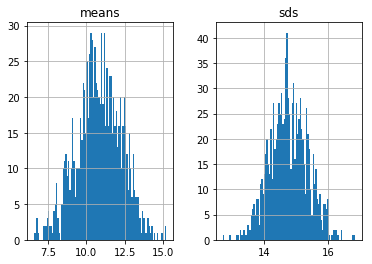

In [12]:
df = describe_sample(pop, 1000, 100)

Mean: 10.81
Std Dev: 14.76


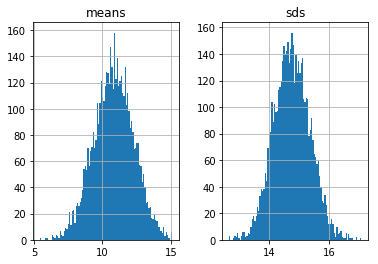

In [15]:
df = describe_sample(pop, 5000, 100)

## Run your final function several times with varying values of samples and n

How did your result begin to converge on the population mean and sd?

## Bootstrapping your data: Finding confidence intervals

Statisticians take advantage of the central limit theorem as a method of establishing confidence intervals. Create a function that finds the nth and (100-n)th percentiles of the distribution of means found with describe_sample.

In [16]:
def bootstrapping(pop, sample, n, percentile):
    df = describe_sample(pop, sample, n)
    li = df['means'].quantile(q=percentile)
    ui = df['means'].quantile(q=1-percentile)
    mean = df['means'].mean()
    
    print('Mean: {}: and CI: {} - {}'.format(np.round(mean, 2),
                                             np.round(li, 2), np.round(ui, 2)))
    
    return df, mean, ui, li

Mean: 10.86
Std Dev: 14.74
Mean: 10.86: and CI: 8.41 - 13.33


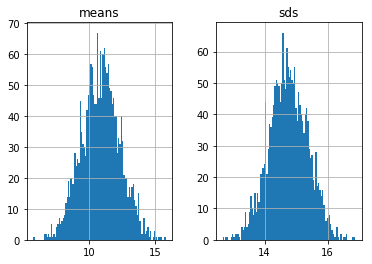

In [18]:
df, mean, ui, li = bootstrapping(pop, 2000, 100, 0.05)